<a href="https://colab.research.google.com/github/evsemenova/Python-for-Analysts/blob/HW_4/%D0%A3%D1%80%D0%BE%D0%BA_4_%D0%9F%D1%80%D0%B5%D0%B4%D0%B2%D0%B0%D1%80%D0%B8%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85_%D0%B8_%D0%B2%D0%B8%D0%B7%D1%83%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_Matplotlib_%D0%B8_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Скачать датасет о качестве КРАСНОГО вина по ссылке. https://archive.ics.uci.edu/ml/datasets/wine+quality**

In [70]:
# Импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt #работает с графиками и диаграммами
import seaborn as sns #работает с графиками и диаграммами

In [71]:
# Загрузим файлы
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep = ';')
# Просмотрим первые 5 строк
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**2. На основе переменной quality с оценками вина создать новую переменную good: если quality > 5, то 1, иначе 0.**

In [72]:
df['good'] = df['quality'].apply(lambda x: 'yes' if x > 5 else 'no')
# Посмотрим
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,yes
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,yes
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,yes
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,yes
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,yes


**3. Исследовать, какие химические характеристики вина влияют на то, окажется оно хорошим или плохим, с применением не менее 5 диаграмм из урока.**

In [73]:
# Просмотрим стили оформления
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [74]:
# Выберим понравившийся
plt.style.use('classic')

In [75]:
# Выявим влияние кислотности на вкус
# Подготовим таблицу
data1 = df.groupby('quality')['fixed acidity'].agg(fixed_acidity = 'mean').reset_index().sort_values(by = 'quality', ascending = False)  
data1.head(10)

,quality,fixed_acidity
6,9,7.420000
5,8,6.657143
4,7,6.734716
3,6,6.837671
2,5,6.933974
1,4,7.129448
0,3,7.600000


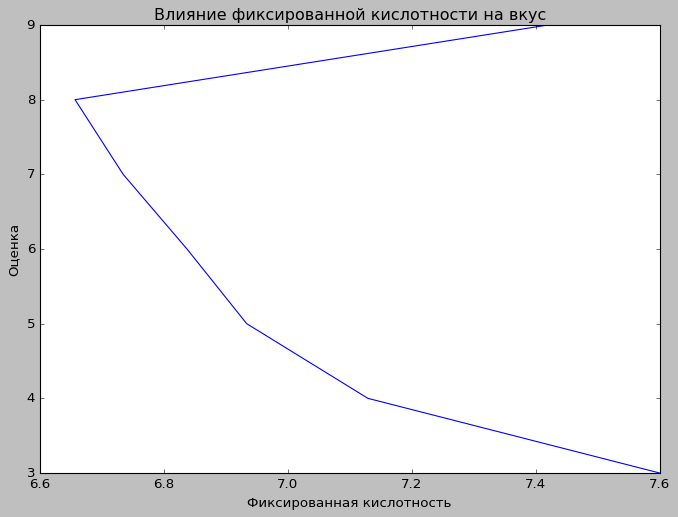

In [76]:
# Создаем линейный график
plt.figure(figsize = (10,7))

plt.plot(data1['fixed_acidity'], data1['quality'])

plt.title('Влияние фиксированной кислотности на вкус')
plt.xlabel('Фиксированная кислотность')
plt.ylabel('Оценка')

plt.show()

Вкус улучшается со снижением фиксированной кислотности


---



In [77]:
# Выделим долю вина, оцененого как хорошее:
data = df['good'].value_counts()
data.head()

yes    3258
no     1640
Name: good, dtype: int64

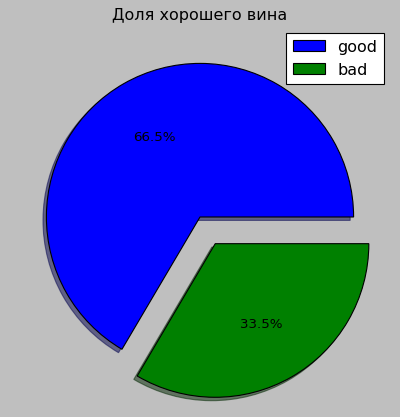

In [78]:
plt.figure(figsize = (8,6))

plt.pie(data, autopct='%1.1f%%', shadow = 0.2, explode = [0, 0.2])

plt.title('Доля хорошего вина')
plt.legend(['good', 'bad'])

plt.show()

Кол-во хороших вин больше, чем плохих

---



In [79]:
# Подготовим данные для анализа вкуса вина
data3 = df.groupby('quality')['alcohol'].agg(alcohol = 'mean').reset_index().sort_values(by = 'quality', ascending = False)  
data.head()

yes    3258
no     1640
Name: good, dtype: int64

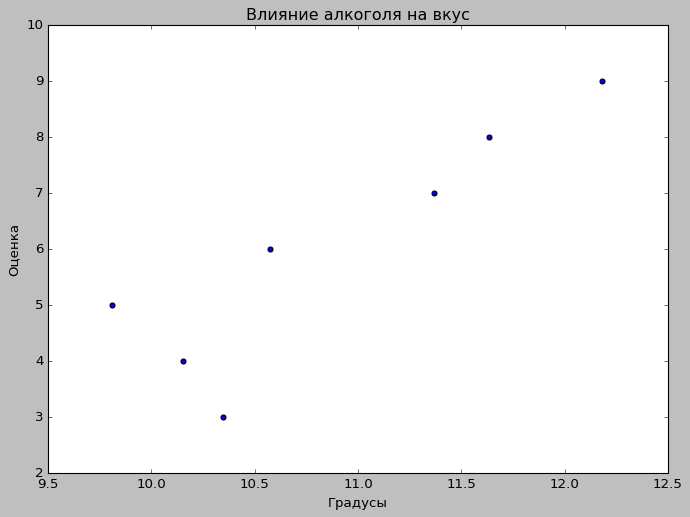

In [80]:
# Строим диаграмму рассеяния

plt.figure(figsize = (10,7))

plt.scatter(data3['alcohol'], data3['quality'])

plt.title('Влияние алкоголя на вкус')
plt.xlabel('Градусы')
plt.ylabel('Оценка')

plt.show()

Вино вкуснее, если градус выше

---



In [81]:
# корреляционная матрица химических характеристик
correlation = round(df.corr(),2)
correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.02,0.29,0.09,0.02,-0.05,0.09,0.27,-0.43,-0.02,-0.12,-0.11
volatile acidity,-0.02,1.00,-0.15,0.06,0.07,-0.10,0.09,0.03,-0.03,-0.04,0.07,-0.19
citric acid,0.29,-0.15,1.00,0.09,0.11,0.09,0.12,0.15,-0.16,0.06,-0.08,-0.01
residual sugar,0.09,0.06,0.09,1.00,0.09,0.30,0.40,0.84,-0.19,-0.03,-0.45,-0.10
chlorides,0.02,0.07,0.11,0.09,1.00,0.10,0.20,0.26,-0.09,0.02,-0.36,-0.21
free sulfur dioxide,-0.05,-0.10,0.09,0.30,0.10,1.00,0.62,0.29,-0.00,0.06,-0.25,0.01
total sulfur dioxide,0.09,0.09,0.12,0.40,0.20,0.62,1.00,0.53,0.00,0.13,-0.45,-0.17
density,0.27,0.03,0.15,0.84,0.26,0.29,0.53,1.00,-0.09,0.07,-0.78,-0.31
pH,-0.43,-0.03,-0.16,-0.19,-0.09,-0.00,0.00,-0.09,1.00,0.16,0.12,0.10
sulphates,-0.02,-0.04,0.06,-0.03,0.02,0.06,0.13,0.07,0.16,1.00,-0.02,0.05


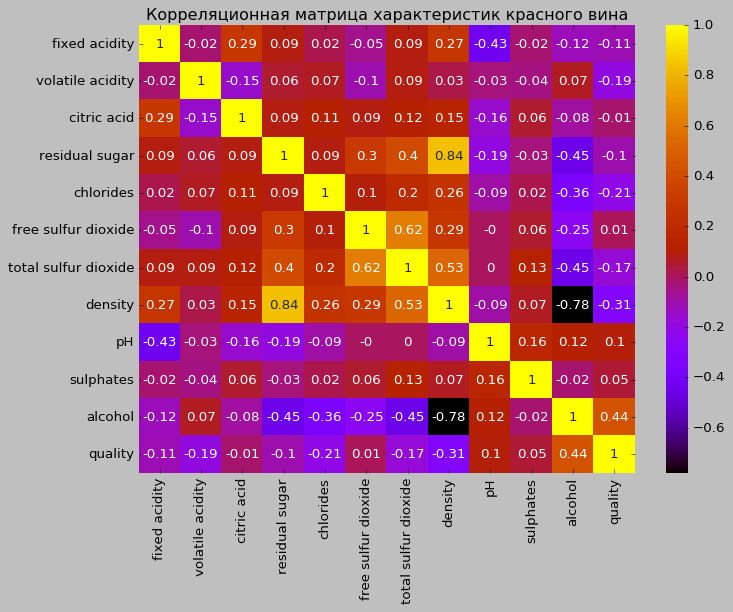

In [82]:
plt.figure(figsize = (10,7))
sns.heatmap(correlation, cmap = 'gnuplot', annot = True)
plt.title('Корреляционная матрица характеристик красного вина')
plt.show()

При увеличении крепости и уровня сульфатов качество вина растёт

---



In [90]:
# Узнаем какое вино самое вкусно при остаточном сахаре
data = df.groupby('quality')['residual sugar'].agg(residual_sugar = 'mean').reset_index().sort_values(by = 'quality', ascending = False)  
data.head(5)

,quality,residual_sugar
6,9,4.120000
5,8,5.671429
4,7,5.186477
3,6,6.441606
2,5,7.334969


In [91]:
plt.style.use('seaborn')

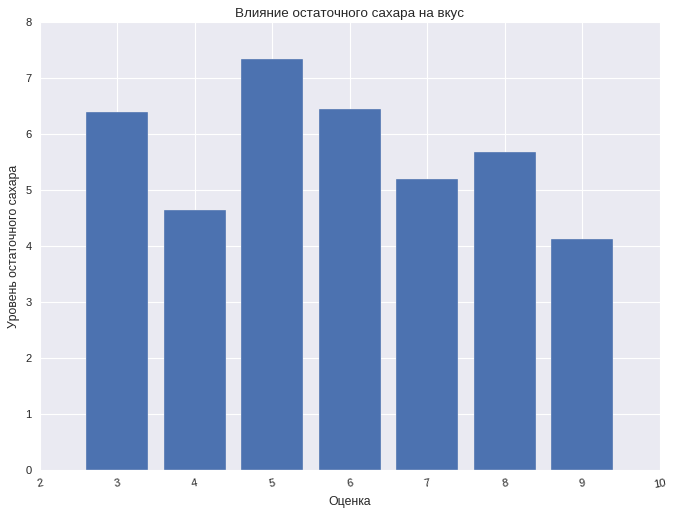

In [92]:
# Узнаем самое вкусное вино с остаточным сахаром

plt.figure(figsize = (10,7))

plt.bar(data['quality'],data['residual_sugar'])

plt.title('Влияние остаточного сахара на вкус')
plt.xlabel('Оценка')
plt.ylabel('Уровень остаточного сахара')
plt.xticks(rotation = 10)

plt.show()

Самое вкусное вино при остаточном сахаре 9

---

